# Ordinal Regression

Here, we conduct an ordinal regression, treating the four familiarity ratings (1-4) as factors

# load packages

In [98]:
library(lmerTest); library(lmerTest); library(lmerTest); library(lmerTest); 
library(ordinal); library(emmeans); library(multcompView); library(lsmeans);library(ordinal)

# load data

In [99]:
#dat <- read.csv("/Users/kirstenziman/Documents/attention-memory-task/Center_Prop_Data.csv", header = TRUE)
dat <- read.csv("/Users/kirstenziman/Documents/attention-memory-task/full.csv", header = TRUE)

dat <- within(dat, {Familiarity_Rating <- as.factor(Familiarity_Rating)})
dat <- dat[dat['Trial.Type']=='Memory',]
dat[dat$AL =='Novel',]['Gaze_Proportion'] <- 0
nrow(dat)

[1] 9280

In [100]:
# dat[dat$AL =='Novel',]

dat


,X,X0,Unnamed..0,Subject,Trial.Type,Run,Cued.Composite,Uncued.Composite,Cued.Face,Cued.Place,⋯,Trial,Cprop,Lprop,Rprop,Image.Prop,Center.Prop,Familiarity_Rating,Gaze_Proportion,AL,Adjusted
81,80,1.9677145,10,8,Memory,0,,,,,⋯,NA,NA,NA,NA,0.0000000,0.04000000,4,0.0000000,Side,2.032286
82,81,-0.6697950,11,8,Memory,0,,,,,⋯,NA,NA,NA,NA,0.8673469,0.02040816,2,0.8673469,None,2.669795
83,82,NA,12,8,Memory,0,,,,,⋯,NA,NA,NA,NA,NA,NA,2,0.0000000,Novel,NA
84,83,NA,13,8,Memory,0,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,0.0000000,Novel,NA
85,84,NA,14,8,Memory,0,,,,,⋯,NA,NA,NA,NA,NA,NA,3,NA,Side,NA
86,85,1.3601054,15,8,Memory,0,,,,,⋯,NA,NA,NA,NA,0.8266667,0.04000000,4,0.8266667,Category,2.639895
87,86,NA,16,8,Memory,0,,,,,⋯,NA,NA,NA,NA,NA,NA,2,0.0000000,Novel,NA
88,87,NA,17,8,Memory,0,,,,,⋯,NA,NA,NA,NA,NA,NA,3,0.0000000,Novel,NA
89,88,NA,18,8,Memory,0,,,,,⋯,NA,NA,NA,NA,NA,NA,3,0.0000000,Novel,NA
90,89,NA,19,8,Memory,0,,,,,⋯,NA,NA,NA,NA,NA,NA,3,0.0000000,Novel,NA


# EXP 2 - ordinal regression, ALL data

In [101]:
mixed_model <- clmm(Familiarity_Rating ~ AL + (Category|Subject), data = dat, threshold = "equidistant", Hess = TRUE)
mm2 <- clmm(Familiarity_Rating ~ AL + (1|Subject), data = dat, threshold = "equidistant", Hess = TRUE)


#fixed_model <- clm(Familiarity_Rating ~ AL + Category, data = dat)
summary(mixed_model)

Cumulative Link Mixed Model fitted with the Laplace approximation

formula: Familiarity_Rating ~ AL + (Category | Subject)
data:    dat

 link  threshold   nobs logLik    AIC      niter      max.grad cond.H 
 logit equidistant 9030 -11224.15 22472.31 1057(3175) 4.96e-03 9.8e+01

Random effects:
 Groups  Name          Variance Std.Dev. Corr          
 Subject (Intercept)   0.4882   0.6987                 
         CategoryFace  0.1260   0.3549    0.628        
         CategoryPlace 0.2613   0.5112   -0.440 -0.305 
Number of groups:  Subject 29 

Coefficients:
         Estimate Std. Error z value Pr(>|z|)    
ALFull   0.426903   0.078502   5.438 5.39e-08 ***
ALNone  -0.005778   0.079725  -0.072    0.942    
ALNovel -0.124051   0.084623  -1.466    0.143    
ALSide   0.473976   0.080444   5.892 3.82e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Threshold coefficients:
            Estimate Std. Error z value
threshold.1 -0.89556    0.15794   -5.67
spacing     

In [34]:
#anova(mixed_model, mm2)

# EXP 2 - paired comparisons, ALL data

In [35]:
marginal <- lsmeans(mixed_model, pairwise ~ AL, adjust="tukey") 
marginal

$lsmeans
 AL       lsmean    SE  df asymp.LCL asymp.UCL
 Category -0.636 0.158 Inf    -0.945    -0.327
 Full     -0.209 0.158 Inf    -0.519     0.101
 None     -0.642 0.157 Inf    -0.949    -0.335
 Novel    -0.760 0.127 Inf    -1.009    -0.511
 Side     -0.162 0.157 Inf    -0.471     0.146

Confidence level used: 0.95 

$contrasts
 contrast         estimate     SE  df z.ratio p.value
 Category - Full  -0.42690 0.0785 Inf -5.438  <.0001 
 Category - None   0.00578 0.0797 Inf  0.072  1.0000 
 Category - Novel  0.12405 0.0846 Inf  1.466  0.5847 
 Category - Side  -0.47398 0.0804 Inf -5.892  <.0001 
 Full - None       0.43268 0.0809 Inf  5.348  <.0001 
 Full - Novel      0.55095 0.0856 Inf  6.433  <.0001 
 Full - Side      -0.04707 0.0814 Inf -0.578  0.9783 
 None - Novel      0.11827 0.0851 Inf  1.389  0.6347 
 None - Side      -0.47975 0.0793 Inf -6.049  <.0001 
 Novel - Side     -0.59803 0.0860 Inf -6.956  <.0001 

P value adjustment: tukey method for comparing a family of 5 estimates 


# EXP 2 - ordinal regression - 1x data

### Load the Data

In [40]:
dat <- read.csv("behav_three.csv", header = TRUE)

dat <- within(dat, {Familiarity.Rating <- as.factor(Familiarity.Rating)})
dat <- dat[dat['Trial.Type']=='Memory',]
nrow(dat)

[1] 6360

In [42]:
mixed_model <- clmm(Familiarity.Rating ~ Attention.Level + (Category|Subject), data = dat, threshold = "equidistant", Hess = TRUE)
mm2 <- clmm(Familiarity.Rating ~ Attention.Level + (1|Subject), data = dat, threshold = "equidistant", Hess = TRUE)


#fixed_model <- clm(Familiarity_Rating ~ AL + Category, data = dat)
summary(mixed_model)

Cumulative Link Mixed Model fitted with the Laplace approximation

formula: Familiarity.Rating ~ Attention.Level + (Category | Subject)
data:    dat

 link  threshold   nobs logLik   AIC      niter     max.grad cond.H 
 logit equidistant 6237 -7705.95 15429.89 835(2508) 2.69e-03 8.8e+01

Random effects:
 Groups  Name          Variance Std.Dev. Corr   
 Subject (Intercept)   0.8834   0.9399          
         CategoryPlace 0.6569   0.8105   -0.706 
Number of groups:  Subject 21 

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
Attention.LevelFull   0.65370    0.09676   6.756 1.42e-11 ***
Attention.LevelNone   0.03501    0.09645   0.363    0.717    
Attention.LevelNovel  0.03342    0.07517   0.445    0.657    
Attention.LevelSide   0.44414    0.09642   4.607 4.09e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Threshold coefficients:
            Estimate Std. Error z value
threshold.1 -0.60041    0.16584   -3.62
spacing      1.64158

In [44]:
#anova(mixed_model, mm2)

# EXP 2 - paired comparisons, 1x data

In [46]:
marginal <- lsmeans(mixed_model, pairwise ~ Attention.Level, adjust="tukey") 
marginal

$lsmeans
 Attention.Level lsmean    SE  df asymp.LCL asymp.UCL
 Category        -1.041 0.166 Inf    -1.366   -0.7164
 Full            -0.387 0.167 Inf    -0.714   -0.0609
 None            -1.006 0.167 Inf    -1.333   -0.6794
 Novel           -1.008 0.156 Inf    -1.313   -0.7028
 Side            -0.597 0.167 Inf    -0.924   -0.2703

Confidence level used: 0.95 

$contrasts
 contrast         estimate     SE  df z.ratio p.value
 Category - Full  -0.65370 0.0968 Inf -6.756  <.0001 
 Category - None  -0.03501 0.0964 Inf -0.363  0.9963 
 Category - Novel -0.03342 0.0752 Inf -0.445  0.9919 
 Category - Side  -0.44414 0.0964 Inf -4.607  <.0001 
 Full - None       0.61869 0.0987 Inf  6.270  <.0001 
 Full - Novel      0.62028 0.0780 Inf  7.951  <.0001 
 Full - Side       0.20956 0.0983 Inf  2.132  0.2066 
 None - Novel      0.00159 0.0747 Inf  0.021  1.0000 
 None - Side      -0.40913 0.0939 Inf -4.355  0.0001 
 Novel - Side     -0.41072 0.0746 Inf -5.502  <.0001 

P value adjustment: tukey meth

# EXP 2 - ordinal regression - gaze between images only

In [ ]:
mixed_model <- clmm(Familiarity_Rating ~ AL + Gaze_Proportion + (1|Subject), data = dat, threshold = "equidistant", Hess = TRUE)

summary(mixed_model)

# if i include image category in the model, it is rank defficient

In [12]:
model.fixed = clm(Familiarity_Rating ~ Gaze_Proportion + AL + Category, data = dat, threshold = "equidistant", Hess = TRUE)
anova(mixed_model,null = model.fixed)

,no.par,AIC,logLik,LR.stat,df,Pr(>Chisq)
model.fixed,7,15276.09,-7631.045,NA,NA,NA
mixed_model,12,14648.51,-7312.257,637.5758,5,1.534002e-135


# plot residuals

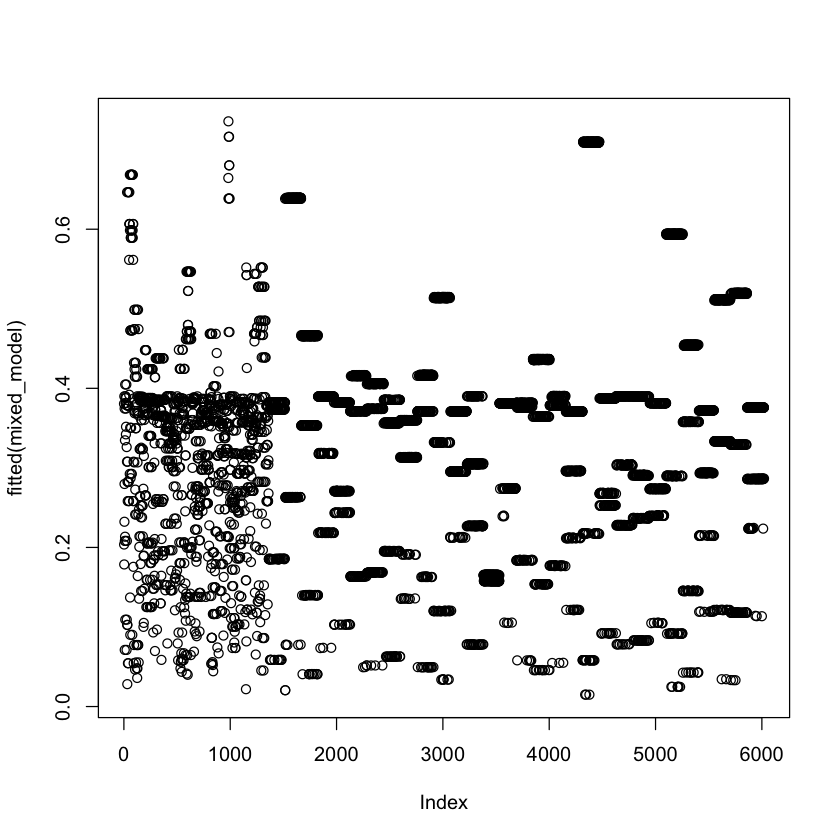

In [29]:
plot(fitted(mixed_model))

# EXP 2 - paired comparisons, gaze only between images

In [13]:
library(multcompView)
library(lsmeans)
library(ordinal)

marginal <- lsmeans(mixed_model, pairwise ~ AL, adjust="tukey") 

marginal

The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.
NOTE: Results may be misleading due to involvement in interactions


$lsmeans
 AL       lsmean    SE  df asymp.LCL asymp.UCL
 Category -1.119 0.160 Inf    -1.433    -0.805
 Full     -0.447 0.161 Inf    -0.762    -0.132
 None     -0.864 0.161 Inf    -1.178    -0.549
 Novel    -1.037 0.126 Inf    -1.285    -0.790
 Side     -0.536 0.161 Inf    -0.851    -0.221

Results are averaged over the levels of: Category 
Confidence level used: 0.95 

$contrasts
 contrast         estimate    SE  df z.ratio p.value
 Category - Full   -0.6722 0.143 Inf -4.690  <.0001 
 Category - None   -0.2555 0.142 Inf -1.794  0.3773 
 Category - Novel  -0.0819 0.106 Inf -0.775  0.9377 
 Category - Side   -0.5833 0.143 Inf -4.078  0.0004 
 Full - None        0.4167 0.144 Inf  2.898  0.0308 
 Full - Novel       0.5903 0.107 Inf  5.500  <.0001 
 Full - Side        0.0889 0.144 Inf  0.618  0.9723 
 None - Novel       0.1736 0.106 Inf  1.631  0.4772 
 None - Side       -0.3278 0.143 Inf -2.284  0.1499 
 Novel - Side      -0.5013 0.107 Inf -4.681  <.0001 

Results are averaged over the le